In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

### Задание 1

Дана матрица объект-признак

In [2]:
x = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

и значения целевой переменной

In [3]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать максимальный R2. Например, берем признак х1 и х3 и строим модель y = b0 + b1 * x1 + b2 * x3, затем признаки x2 и x1 и тд
2. Является ли значимым получившееся уравнение регрессии?

In [4]:
x.shape, y.shape

((10, 4), (10,))

In [5]:
# x1 и x3
x1 = np.array([[ 1.22401313, 3.03636353],
[-0.18757272,  5.12093014],
[-0.81094525, 5.79686488],
[ 0.75129018, 3.65529809],
[ 0.00972362, 2.50594319],
[-0.62972637, 2.84124027],
[ 2.29536229, 1.95026215],
[ 0.0920418 , 7.47708735],
[ 2.39252799, 3.61420599],
[ 0.54983815, 1.65752765]])

In [6]:
ones = np.ones((x1.shape[0], 1))
x1 = np.hstack((ones, x1))
x1

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

In [7]:
XTX1 = x1.T.dot(x1)

np.linalg.det(XTX1)

2835.3600226240965

In [8]:
XTX1_inv = np.linalg.inv(XTX1)

b = XTX1_inv.dot(x1.T).dot(y)

print(b)

[3.62455695 1.62531203 1.21134979]


In [9]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [10]:
z1 = x1.dot(b)

In [11]:
R2_1 = 1 - ((y - z1)**2).sum() / sum_of_squares(y)
R2_1

0.763424623879315

In [12]:
# x1 и x4
x2 = np.array([[ 1.22401313, 2.69287214],
[-0.18757272,  3.46363202],
[-0.81094525, 1.86159445],
[ 0.75129018,  1.66746094],
[ 0.00972362,  1.69755173],
[-0.62972637,  4.54410559],
[ 2.29536229,  1.51874636],
[ 0.0920418 ,  2.61081203],
[ 2.39252799,  5.10773362],
[ 0.54983815,  1.59635987]])

In [13]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2

array([[ 1.        ,  1.22401313,  2.69287214],
       [ 1.        , -0.18757272,  3.46363202],
       [ 1.        , -0.81094525,  1.86159445],
       [ 1.        ,  0.75129018,  1.66746094],
       [ 1.        ,  0.00972362,  1.69755173],
       [ 1.        , -0.62972637,  4.54410559],
       [ 1.        ,  2.29536229,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.61081203],
       [ 1.        ,  2.39252799,  5.10773362],
       [ 1.        ,  0.54983815,  1.59635987]])

In [14]:
XTX2 = x2.T.dot(x2)

np.linalg.det(XTX2)

1689.2124743606066

In [15]:
XTX2_inv = np.linalg.inv(XTX2)

b = XTX2_inv.dot(x2.T).dot(y)

print(b)

[5.70686123 0.68359949 1.12650707]


In [16]:
z2 = x2.dot(b)
R2_2 = 1 - ((y - z2)**2).sum() / sum_of_squares(y)
R2_2

0.4532966783144079

In [17]:
# x2 и x3
x3 = np.array([[ 2.30868478, 3.03636353],
[ 1.30337355, 5.12093014],
[ 1.82463398, 5.79686488],
[  2.67392052, 3.65529809],
[  1.97367255, 2.50594319],
[ 0.77750764, 2.84124027],
[  1.81206697, 1.95026215],
[  2.26971361, 7.47708735],
[  3.17563985, 3.61420599],
[  2.87988651, 1.65752765]])

In [18]:
ones = np.ones((x3.shape[0], 1))
x3 = np.hstack((ones, x3))
x3

array([[1.        , 2.30868478, 3.03636353],
       [1.        , 1.30337355, 5.12093014],
       [1.        , 1.82463398, 5.79686488],
       [1.        , 2.67392052, 3.65529809],
       [1.        , 1.97367255, 2.50594319],
       [1.        , 0.77750764, 2.84124027],
       [1.        , 1.81206697, 1.95026215],
       [1.        , 2.26971361, 7.47708735],
       [1.        , 3.17563985, 3.61420599],
       [1.        , 2.87988651, 1.65752765]])

In [19]:
XTX3 = x3.T.dot(x3)

np.linalg.det(XTX3)

1427.8125776081506

In [20]:
XTX3_inv = np.linalg.inv(XTX3)

b = XTX3_inv.dot(x3.T).dot(y)

print(b)

[2.48896193 1.60611956 0.86269915]


In [21]:
z3 = x3.dot(b)
R2_3 = 1 - ((y - z3)**2).sum() / sum_of_squares(y)
R2_3

0.547948273403901

In [22]:
# x2 и x4
x4 = np.array([[  2.30868478,  2.69287214],
[ 1.30337355,  3.46363202],
[ 1.82463398,  1.86159445],
[ 2.67392052,  1.66746094],
[ 1.97367255,  1.69755173],
[ 0.77750764,  4.54410559],
[  1.81206697,  1.51874636],
[  2.26971361,  2.61081203],
[  3.17563985,  5.10773362],
[  2.87988651,  1.59635987]])

In [23]:
ones = np.ones((x4.shape[0], 1))
x4 = np.hstack((ones, x4))
x4

array([[1.        , 2.30868478, 2.69287214],
       [1.        , 1.30337355, 3.46363202],
       [1.        , 1.82463398, 1.86159445],
       [1.        , 2.67392052, 1.66746094],
       [1.        , 1.97367255, 1.69755173],
       [1.        , 0.77750764, 4.54410559],
       [1.        , 1.81206697, 1.51874636],
       [1.        , 2.26971361, 2.61081203],
       [1.        , 3.17563985, 5.10773362],
       [1.        , 2.87988651, 1.59635987]])

In [24]:
XTX4 = x4.T.dot(x4)

np.linalg.det(XTX4)

701.732736445317

In [25]:
XTX4_inv = np.linalg.inv(XTX4)

b = XTX4_inv.dot(x4.T).dot(y)

print(b)

[1.91685221 1.74373667 1.31971882]


In [26]:
z4 = x4.dot(b)
R2_4 = 1 - ((y - z4)**2).sum() / sum_of_squares(y)
R2_4

0.6062055761129934

In [27]:
# x1 и x2
x5 = np.array([[ 1.22401313, 2.30868478],
[-0.18757272, 1.30337355],
[-0.81094525, 1.82463398],
[ 0.75129018, 2.67392052],
[ 0.00972362, 1.97367255],
[-0.62972637, 0.77750764],
[ 2.29536229, 1.81206697],
[ 0.0920418 , 2.26971361],
[ 2.39252799, 3.17563985],
[ 0.54983815, 2.87988651]])

In [28]:
ones = np.ones((x5.shape[0], 1))
x5 = np.hstack((ones, x5))
x5

array([[ 1.        ,  1.22401313,  2.30868478],
       [ 1.        , -0.18757272,  1.30337355],
       [ 1.        , -0.81094525,  1.82463398],
       [ 1.        ,  0.75129018,  2.67392052],
       [ 1.        ,  0.00972362,  1.97367255],
       [ 1.        , -0.62972637,  0.77750764],
       [ 1.        ,  2.29536229,  1.81206697],
       [ 1.        ,  0.0920418 ,  2.26971361],
       [ 1.        ,  2.39252799,  3.17563985],
       [ 1.        ,  0.54983815,  2.87988651]])

In [29]:
XTX5 = x5.T.dot(x5)

np.linalg.det(XTX5)

349.77820338188496

In [30]:
XTX5_inv = np.linalg.inv(XTX5)

b = XTX5_inv.dot(x5.T).dot(y)

print(b)

[6.70781579 0.40786841 1.03360247]


In [31]:
z5 = x5.dot(b)
R2_5 = 1 - ((y - z5)**2).sum() / sum_of_squares(y)
R2_5

0.18113594742585215

In [32]:
# x3 и x4
x6 = np.array([[ 3.03636353, 2.69287214],
[ 5.12093014, 3.46363202],
[ 5.79686488, 1.86159445],
[ 3.65529809, 1.66746094],
[ 2.50594319, 1.69755173],
[ 2.84124027, 4.54410559],
[  1.95026215, 1.51874636],
[  7.47708735, 2.61081203],
[  3.61420599, 5.10773362],
[ 1.65752765, 1.59635987]])

In [33]:
ones = np.ones((x6.shape[0], 1))
x6 = np.hstack((ones, x6))
x6

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [34]:
XTX6 = x6.T.dot(x6)

np.linalg.det(XTX6)

4547.328074863321

In [35]:
XTX6_inv = np.linalg.inv(XTX6)

b = XTX6_inv.dot(x6.T).dot(y)

print(b)

[3.64001086 0.70753914 1.04851745]


In [36]:
z6 = x6.dot(b)
R2_6 = 1 - ((y - z6)**2).sum() / sum_of_squares(y)
R2_6

0.622441987650532

Пара x1 и x3 даёт максимальный R2, значит эти признаки значимы

In [37]:
n = 10
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [38]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [39]:
# F-критерий Фишера
F = (R2_1 / k1) / ((1 - R2_1) / k2)
F

25.815860852394596

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

### Задание 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

In [40]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

In [41]:
df = pd.DataFrame({'salary': [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],\
                   'scoring': [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})

In [42]:
b = (np.mean(df.salary * df.scoring) - np.mean(df.salary) * np.mean(df.scoring)) / (np.mean(df.salary**2) - np.mean(df.salary) ** 2)
a = np.mean(df.scoring) - b * np.mean(df.salary)
print(f'y = {a} + {b}x')

y = 444.1773573243596 + 2.620538882402765x


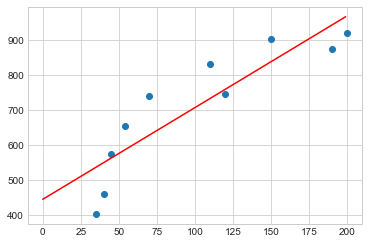

In [43]:
plt.scatter(df.salary, df.scoring)
t = np.arange(0, 200, 1)
v = a + b * t
plt.plot(t, v, color='r')

In [44]:
X = df.salary.values.reshape((10,1))
y = df.scoring.values.reshape((10,1))

In [45]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([[5.88982042]])

In [46]:
X = df.salary.values.reshape((10,1))
X = np.hstack([np.ones((10, 1)), X])
y = df.scoring.values.reshape((10,1))

In [47]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([[444.17735732],
       [  2.62053888]])

In [48]:
z = 444.1773573243596 + 2.620538882402765 * df.salary.values

In [49]:
# коэффициент детерминации
R1 = 1 - ((df.scoring.values - z)**2).sum() / sum_of_squares(df.scoring.values)
R1

0.7876386635293686

In [50]:
n = df.salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [51]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [52]:
# F-критерий Фишера
F = (R1 / k1) / ((1 - R1) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.